# Binary Classification: Simple Logistic Regression with Statsmodels

Predict whether a bank client is likely to default on their loan or not.

Note that interest rate indicates the 3-month interest rate between banks and duration indicates the time since the last contact was made with a given consumer. The previous variable shows whether the last marketing campaign was successful with this customer. The march and may are Boolean variables that account for when the call was made to the specific customer and credit shows if the customer has enough credit to avoid defaulting.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load data

In [2]:
# load bank csv data and store in df
url = "https://raw.githubusercontent.com/lucaskienast/Classification-Models/main/1)%20Binary%20Classification/Bank_data.csv"
df = pd.read_csv(url)
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,0.0,157.0,no


## Map target: yes/no -> 1/0

In [3]:
# change yes/no in column y to 1/0
df["y"] = np.where(df["y"]=="yes", 1, 0)
df.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


## Explore data

In [4]:
# show summary descriptive statistics
df.describe(include="all")

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


## Declare features and targets

In [5]:
# create feature (X) and target (y) variables
y = df["y"]
X1 = df["duration"]

## Create Simple Logistic Regression Model

In [6]:
# build model
X = sm.add_constant(X1) # y-intercept
log_reg = sm.Logit(y, X)
log_results = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


## Interpret Model

In [7]:
# show summary of logit regression model
print(log_results.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Fri, 27 Aug 2021   Pseudo R-squ.:                  0.2121
Time:                        18:25:13   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006


The dependent variable is 'duration'. The model used is a Logit regression (logistic in common lingo), while the method - Maximum Likelihood Estimation (MLE). It has clearly converged after classifyin 518 observations.

The Pseudo R-squared is 0.21 which is within the 'acceptable region'.

The duration variable is significant and its coefficient is 0.0051.

The constant is also significant and equals: -1.70

The logit model goes as follows:

$ log( \frac{P(x)}{1-P(x)} ) = -1.7 + 0.0051 * duration $

$ log( odds(x) ) = -1.7 + 0.0051 * t $

Hence,

$ log( odds(x_1) ) = -1.7 + 0.0051 * t_1 $

$ log( odds(x_2) ) = -1.7 + 0.0051 * t_2 $

That gives:


$ log( \frac{odds(x_1)}{odds(x_2)} ) = 0.0051 ( t_1 - t_2 ) $

Taking the exponential:

$ \frac{odds(x_1)}{odds(x_2)} = exp^{0.0051 ( t_1 - t_2 )} $

Assume $t_1 - t_2 = 100 days$:

$ \frac{odds(x_1)}{odds(x_2)} = exp^{0.0051*100} $

$ \frac{odds(x_1)}{odds(x_2)} = 1.7 $

Therefore,

$ odds(x_1) = 1.7 * odds(x_2) $

So given person x1 has 100 more days to pay back their loan than x2, x1 is 1.7 times as likely to not default on it than x2.

## Plot scatter plot

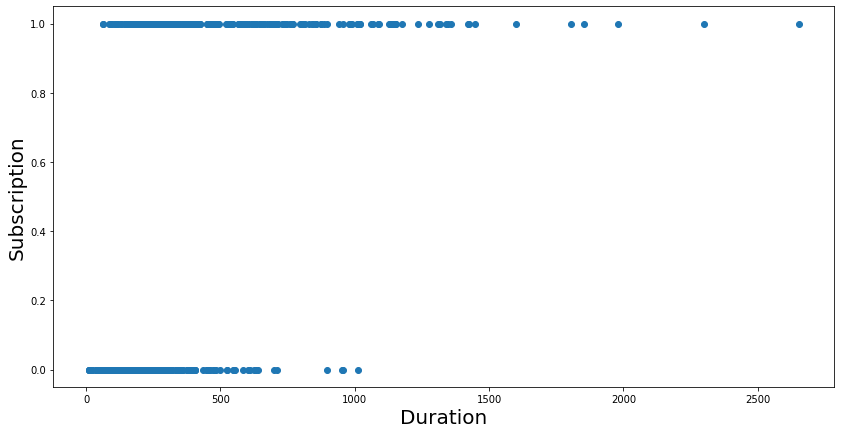

In [13]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.figure(figsize=(14,7))
plt.scatter(X1,y,color = 'C0')
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

In [14]:
np.exp(0.0051)

1.005113027136717

The odds of duration are pretty close to 1. This tells us that although duration is a significant predictor, a change in 1 day would barely affect the regression.

Note that we could have inferred that from the coefficient itself.

Finally, note that the data is not standardized (scaled) and duration is a feature of a relatively big order of magnitude.